<a href="https://colab.research.google.com/github/eminaomasa/energy_usage_prediction/blob/emiko/Modeling_stillworking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling 
This notebook demonstrates our modeling process. 
 
We evaluated ten machine learning algorithms. 

1. Dummy Regressor
2. Lasso Regression
3. Ridge Regression
4. Elastic Net
5. Decision Tree
6. Random Forest
7. Gradient Boosting (GBM)
8. Light Gradient Boosting (Light GBM)
9. Extreme Gradient Boosting (XGBM)
10. Adaboost

First, we check each model’s R2 score in a default setting and pick the best performing model by comparing R2 scores. 
Secondly, for the top-performing model, we do hyperparameter tuning with a grid search. 
Lastly, we explore feature imporance of our final model. 

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load data sets that we cleaned and saved from MyDrive.  

import pandas as pd

# train data 
X_scaled = pd.read_csv('gdrive/MyDrive/Data/X_scaled.csv', index_col=0)
y = pd.read_csv('gdrive/MyDrive/Data/y.csv', index_col=0)

# test data 
test = pd.read_csv('gdrive/MyDrive/Data/test_scaled.csv', index_col=0)

X_scaled.shape

(74999, 125)

In [ ]:
# import necessary library 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import arange

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Lasso, Ridge, LassoCV, LinearRegression, ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from xgboost import XGBRegressor

import lightgbm

from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_val_score, cross_validate, train_test_split

import warnings 

In [ ]:
# Split train set into train and test for model validation  

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=50) 

## Modeling 

We built 10 machine learning models in a default setting and use cross-validation to select a best performing algorithm. 

To stream line this process, we created a function which fit a model and return a mean R2 score from cross validation.  

In [ ]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)
    
        
    def r2(self):
        return round(self.cv_mean, 4)    


        



In [ ]:
# data frame to store the mean R2 score for each model
result = pd.DataFrame()
df_model = [] 
df_r2 = []

### 1. Baseline model

In [ ]:
# Baseline model = Dummy regressor 
model1 = DummyRegressor(strategy = 'mean') 

# Fit the model and data to cross val function
model1_results = ModelWithCV(
                        model=model1,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
)

# report the r2 scores 
model1_results.print_cv_summary()

# store the R2 scores
df_r2.append(model1_results.r2())

CV Results for `dummy` model:
            -0.00013 ± 0.00013 accuracy
        


In [ ]:
df_r2

[-0.0001]

### 2. Lasso Regression

In [ ]:
# 2. Lasso Regression
model2 = Lasso(random_state = 42)

# Fit the model and data to cross val function
model2_results = ModelWithCV(
                        model=model2,
                        model_name='lasso',
                        X=X_train, 
                        y=y_train
)


# report the r2 scores 
model2_results.print_cv_summary()

# store the R2 scores
df_r2.append(model2_results.r2())

CV Results for `lasso` model:
            0.42386 ± 0.01787 accuracy
        


In [ ]:
df_r2

[-0.0001, 0.4239]

### 3. Ridge Regression

In [ ]:
# 3. Ridge Regression
model3 = Ridge(random_state = 42)

# Fit the model and data to cross val function
model3_results = ModelWithCV(
                        model=model3,
                        model_name='ridge',
                        X=X_train, 
                        y=y_train
)

# report the r2 scores 
model3_results.print_cv_summary()

# store the R2 scores
df_r2.append(model3_results.r2())

CV Results for `ridge` model:
            0.45081 ± 0.01882 accuracy
        


In [ ]:
df_r2

[-0.0001, 0.4239, 0.4508]

### 4. Elastic Net

In [ ]:
# 4. Elastic Net 
model4 = ElasticNet(random_state = 42)

# Fit the model and data to cross val function
model4_results = ModelWithCV(
                        model=model4,
                        model_name='elasticnet',
                        X=X_train, 
                        y=y_train
)

# report the r2 scores 
model4_results.print_cv_summary()

# store the R2 scores
df_r2.append(model4_results.r2())

CV Results for `elasticnet` model:
            0.38734 ± 0.01464 accuracy
        


In [ ]:
df_r2

[-0.0001, 0.4239, 0.4508, 0.3873]

### 5. Decision Tree

In [ ]:
# 5. Decision Tree
model5 = DecisionTreeRegressor(random_state = 42)

# Fit the model and data to cross val function
model5_results = ModelWithCV(
                        model=model5,
                        model_name='decitiontree',
                        X=X_train, 
                        y=y_train
)

# report the r2 scores 
model5_results.print_cv_summary()

# store the R2 scores
df_r2.append(model5_results.r2())

CV Results for `decitiontree` model:
            0.21828 ± 0.04318 accuracy
        


In [ ]:
df_r2

[-0.0001, 0.4239, 0.4508, 0.3873, 0.2183]

### 6.Random Forest

In [ ]:
# 6. Random Forest
model6 = RandomForestRegressor(random_state = 42)

# Fit the model and data to cross val function
model6_results = ModelWithCV(
                        model=model6,
                        model_name='randomforest',
                        X=X_train, 
                        y=y_train
)


# report the r2 scores 
model6_results.print_cv_summary()

# store the R2 scores
df_r2.append(model6_results.r2())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: ignored

In [ ]:
df_r2

[-0.0001, 0.4239, 0.4508, 0.3873, 0.2183]

In [ ]:
y_train.values.reshape(-1,)

array([ 96.88726069,  69.19909601, 132.3       , ..., 127.7028685 ,
        98.94696263,  74.49937155])

In [ ]:
y_train.values.ravel()

array([ 96.88726069,  69.19909601, 132.3       , ..., 127.7028685 ,
        98.94696263,  74.49937155])

In [ ]:
np.ravel(y_train,order="c")

array([ 96.88726069,  69.19909601, 132.3       , ..., 127.7028685 ,
        98.94696263,  74.49937155])

In [ ]:
y_train

,site_eui
19598,96.887261
18873,69.199096
51644,132.300000
47961,117.586551
74881,287.990499
...,...
55890,38.893443
59917,86.862022
48896,127.702868
22921,98.946963


### 7. Gradient Boosting (GBM)

In [ ]:
# 7. Gradient Boosting (GBM)
model7 = GradientBoostingRegressor(random_state = 42)

# Fit the model and data to cross val function
model7_results = ModelWithCV(
                        model=model7,
                        model_name='GBM',
                        X=X_train, 
                        y=y_train
)

# report the r2 scores 
model7_results.print_cv_summary()

# store the R2 scores
df_r2.append(model7_results.r2())

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

CV Results for `GBM` model:
            0.47595 ± 0.01651 accuracy
        


In [ ]:
df_r2

[-0.0001, 0.4239, 0.4508, 0.3873, 0.2183, 0.476]

### 8. Light Gradient Boosting (Light GBM)

In [ ]:
# 8. Light Gradient Boosting (Light GBM)
model8 = lightgbm.LGBMRegressor(random_state = 42)

# Fit the model and data to cross val function
model8_results = ModelWithCV(
                        model=model8,
                        model_name='lightGBM',
                        X=X_train, 
                        y=y_train
)


# report the r2 scores 
model8_results.print_cv_summary()

# store the R2 scores
df_r2.append(model8_results.r2())

CV Results for `lightGBM` model:
            0.53652 ± 0.01381 accuracy
        


In [ ]:
df_r2

[-0.0001, 0.4239, 0.4508, 0.3873, 0.2183, 0.476, 0.5365]

### 9. Extreme Gradient Boosting (XGBM)

In [ ]:
# 9. Extreme Gradient Boosting (XGBM)
model9 = XGBRegressor(random_state = 42)

# Fit the model and data to cross val function
model9_results = ModelWithCV(
                        model=model9,
                        model_name='XGBM',
                        X=X_train, 
                        y=y_train
)


# report the r2 scores 
model9_results.print_cv_summary()

# store the R2 scores
df_r2.append(model9_results.r2())

[18:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
df_r2

[-0.0001, 0.4239, 0.4508, 0.3873, 0.2183, 0.476, 0.5365, 0.4755]

### 10. Adaboost

In [ ]:
# 10. Adaboost
model10 = AdaBoostRegressor(random_state = 42)

# Fit the model and data to cross val function
model10_results = ModelWithCV(
                        model=model10,
                        model_name='adaboost',
                        X=X_train, 
                        y=y_train
)


# report the R2 scores 
model10_results.print_cv_summary()

# store the R2 scores
df_r2.append(model10_results.r2())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

CV Results for `adaboost` model:
            0.09338 ± 0.11512 accuracy
        


In [ ]:
df_r2

[-0.0001, 0.4239, 0.4508, 0.3873, 0.2183, 0.476, 0.5365, 0.4755, 0.0934]

### Model Selection

In below, we plot R2 scores for 10 models. 

In [ ]:
# With stored R2 scores, create a result data frame 
result = pd.DataFrame()
df_model = ['model_' + str(i) for i in range(1,10)] # range(1,11)
#df_r2 = []
result['model'] = df_model
result['r2'] = df_r2 

result


,model,r2
0,model_1,-0.0001
1,model_2,0.4239
2,model_3,0.4508
3,model_4,0.3873
4,model_5,0.2183
5,model_6,0.4760
6,model_7,0.5365
7,model_8,0.4755
8,model_9,0.0934


In [ ]:

result.r2 

0   -0.0001
1    0.4239
2    0.4508
3    0.3873
4    0.2183
5    0.4760
6    0.5365
7    0.4755
8    0.0934
Name: r2, dtype: float64

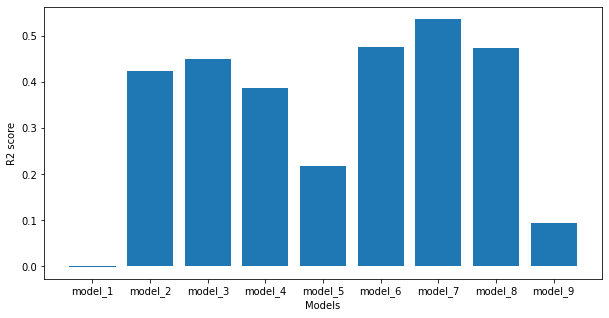

In [ ]:
# Bar plot of R2 scores for 10 models 
fig = plt.figure(figsize =(10, 5))
 
# Horizontal Bar Plot
model_name = result.model 
scores = result.r2 

plt.bar(model_name, scores)
plt.xlabel('Models')
plt.ylabel('R2 score');

Following this method, we picked Light GBM as our candidate model (see above figure). For Light GBM, we did hyperparameter tuning with a grid search. 


We skip hyperparameter tuning in this notebook because the grid search takes over 4 hours to complete. Instead, we saved the grid search notebook in our github. If interested, please check the grid search notebook. 



## Final Model (Light GBM)

In this section, we evaluate our final model tuned in the best parameters we got from the grid search.   

In [ ]:
# Final Model: Light GBM with tuned parametor 

# set the best parameters we got from the grid search.
bestmodel = lightgbm.LGBMRegressor(learning_rate=0.1, max_depth=-1, 
                                    n_estimators= 1000, num_leaves = 100, reg_alpha = 0.05)


# Fit the model and data to cross val function
bestmodel_results = ModelWithCV(
                        model=bestmodel,
                        model_name='lightGBM tuned',
                        X=X_train, 
                        y=y_train
)


# report the r2 scores 
bestmodel_results.print_cv_summary()

# store the R2 scores
df_r2.append(bestmodel_results.r2())




CV Results for `lightGBM tuned` model:
            0.59954 ± 0.01337 accuracy
        


Add best model R2 score in the earlier R2 bar plot figure.

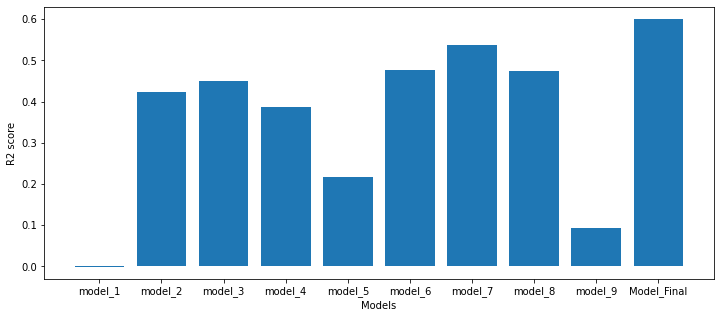

In [ ]:
# Add best model R2 score in the earlier figrue 

# define a result data frame 
result2 = pd.DataFrame()
df_model = ['model_' + str(i) for i in range(1,10)] # range(1,11)
df_model2 = df_model + ['Model_Final']
result2['model'] = df_model2
result2['r2'] = df_r2 


# Plot R2 scores for 10 models + final model  
fig = plt.figure(figsize =(12, 5))
 
# Horizontal Bar Plot
plt.bar(result2.model, result2.r2 )
plt.xlabel('Models')
plt.ylabel('R2 score');

We fit the test set and check the R2 score. 

In [ ]:
# Fit into train set 
bestmodel.fit(X_train, y_train)

# report R2 score with test set 
r2_test = bestmodel.score(X_test,y_test)

print('Final Model R2 socre with test set: ', r2_test )

Final Model R2 socre with test set:  0.6072831231917277


### Make prediction for Kaggle submission.  
Finally, we make prediction using the test set provided by Kaggle, and save it in a submission file.  

In [ ]:
# create the solution dataframe with two columns: 'id' and 'site_eui' for submission to datathon
solution = bestmodel.predict(test)
solution = pd.DataFrame(solution, columns = ['site_eui'], index = test.index)
solution['id'] = solution.index
solution_columns = ['id','site_eui']
solution = solution[solution_columns]
solution = solution.reset_index(drop=True)

# save in csv format 
solution.to_csv('gdrive/MyDrive/Data/solution.csv', index = False)

solution.head()

,id,site_eui
0,75757,239.203506
1,75758,199.770882
2,75759,171.403348
3,75760,267.006421
4,75761,265.777978


## Feature Analysis


Lastly, we conducted the feature anlaysis with our final model. 

Important features within the model

In [ ]:
# Create a dataframe which contains feature names and corresponding feature importance scores  
zipzip = zip(bestmodel.feature_importances_, X_train.columns)
df_feature = pd.DataFrame(data = zipzip, columns = ['importance','feature'])

# Sort the dataframe by importance scores  
df_feature.sort_values('importance', ascending = False, inplace = True)

# Top 10 important features 
top10 = df_feature.head(10)
top10

,importance,feature
0,22767,floor_area
53,21302,energy_star_rating_imputed
1,20329,year_built
2,5507,ELEVATION
54,1361,x0_Residential
86,1126,x1_Office_Uncategorized
81,699,x1_Multifamily_Uncategorized
35,632,november_max_temp
56,623,x1_Commercial_Other
41,590,precipitation_inches


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


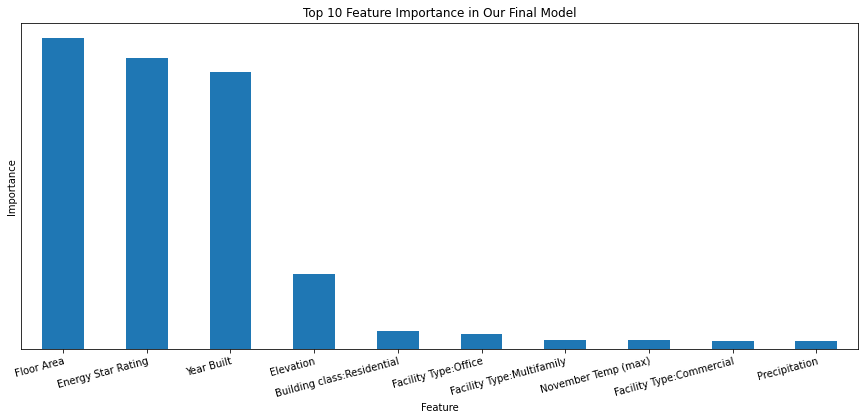

In [ ]:
# Create a figure of top 10 feature importance 

feat_renamed = ['Floor Area', 'Energy Star Rating' ,'Year Built', 'Elevation',
                  'Building class:Residential', 'Facility Type:Office',  'Facility Type:Multifamily', 
                  'November Temp (max)', 'Facility Type:Commercial', 'Precipitation']

top10['Top Features'] = feat_renamed

top10.plot.bar(x= 'Top Features', y = 'importance', figsize = (15,6), title = 'Top 10 Feature Importance in Our Final Model',
                    ylabel = 'Importance', xlabel = 'Feature', legend = None)
plt.xticks(rotation=15, rotation_mode='anchor', ha='right')
plt.yticks([]);


Insights: 

Floor area was the most important factor in determining energy use intensity of a building. Additionally, energy star rating and year built are the important features as well. This is consistent with the existing studies: ..... 
